In [1]:
import numpy as np
import pandas as pd
import missingno as msno

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.describe(include='all')

,vidid,adview,views,likes,dislikes,comment,published,duration,category
count,14999,1.499900e+04,14999,14999,14999,14999,14999,14999,14999
unique,14999,NaN,14588,4789,1546,2007,2386,3146,8
top,VID_18655,NaN,885,1,0,0,2016-08-26,PT31S,D
freq,1,NaN,4,174,1091,1290,42,147,7558
mean,NaN,2.107791e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.237711e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,6.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_df.isnull().sum().sort_values(ascending = False).head(10)

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

<Axes: >

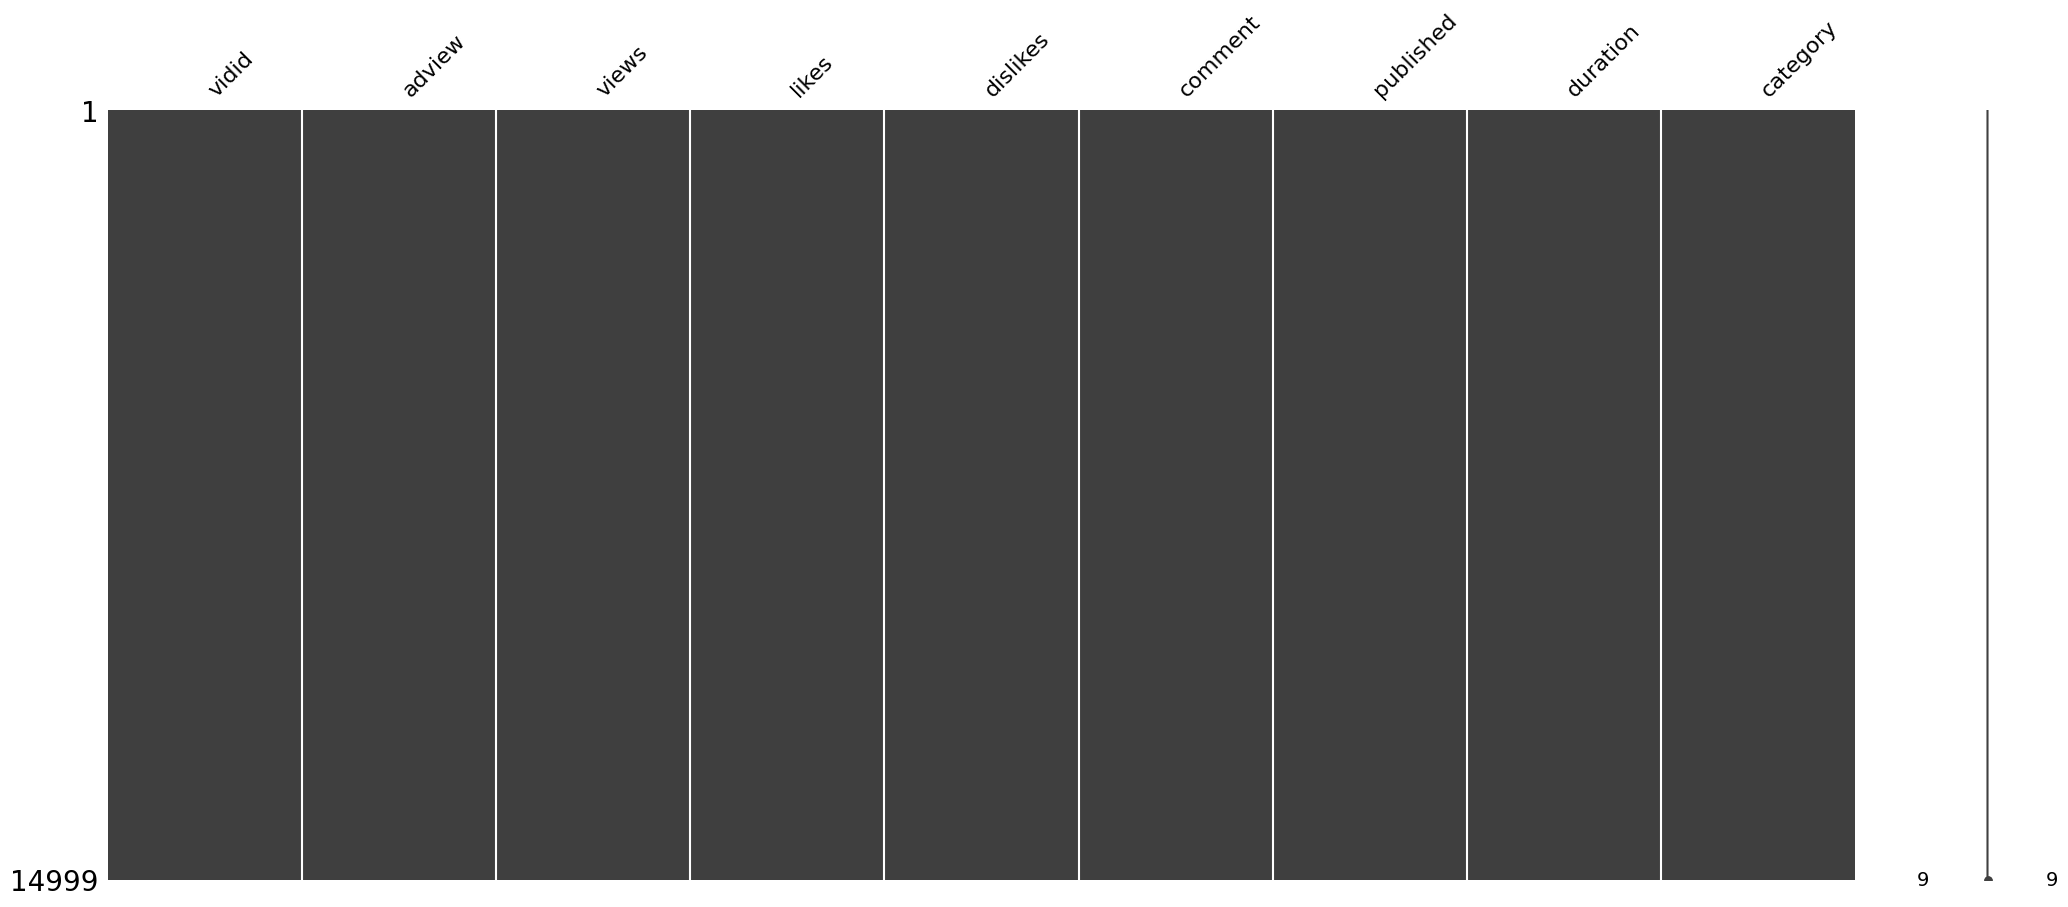

In [5]:
msno.matrix(train_df)

In [6]:
test_df.describe(include='all')

,vidid,views,likes,dislikes,comment,published,duration,category
count,8764,8764,8764,8764,8764,8764,8764,8764
unique,8764,8605,3434,1215,1556,2109,2330,8
top,VID_1054,688,2,0,0,2016-08-26,PT31S,D
freq,1,3,89,662,727,32,120,4419


In [7]:
null_train = train_df.isnull().sum()
null_test = test_df.isnull().sum()
null_train = null_train.drop('adview')
null_comp_df = null_train.compare(null_test).sort_values(['self'],ascending = [False])
null_comp_df  


,self,other


In [8]:
train_df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [9]:
convert_col = ['views', 'likes', 'dislikes', 'comment']
# these columns contain 'F' letter. So replace it by '0'. As we are converting columns to numerical.
for col in convert_col:
  train_df[col].replace({"F": 0}, inplace=True)
  test_df[col].replace({"F": 0}, inplace=True)
for col in convert_col:
     train_df[col] = train_df[col].astype('int')
     test_df[col] = test_df[col].astype('int')


C:\Users\2k22c\AppData\Local\Temp\ipykernel_52960\3807146663.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].replace({"F": 0}, inplace=True)
C:\Users\2k22c\AppData\Local\Temp\ipykernel_52960\3807146663.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [10]:


train_df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [11]:

# convert "duration" column format into "second" format
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

train_mp = train_df["duration"]
test_mp = test_df["duration"]

train_time = train_mp.apply(checki)
test_time = test_mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)

train_time=train_time.apply(func_sec)
test_time=test_time.apply(func_sec)

train_df["duration"]=train_time
test_df["duration"]=test_time
# train_df.head()

In [12]:
import datetime

In [13]:
train_df['published'] = pd.DatetimeIndex(train_df['published']).year
test_df['published'] = pd.DatetimeIndex(test_df['published']).year



In [14]:
train_df['duration']
train_df['published']
combined_df = pd.concat([train_df,test_df],axis=0)

combined_df["Label"] = "test"
combined_df["Label"][:14999] = "train"


C:\Users\2k22c\AppData\Local\Temp\ipykernel_52960\2327758112.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  combined_df["Label"][:14999] = "train"
C:\Users\2k22c\AppData\Local\Temp\ipykernel_52960\2327758112.py:6: SettingWithCopyWarning

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\2k22c\AppData\Local\Temp\ipykernel_52960\3421848839.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df[feature], hist = False, kde = True, kde_kws = {'linewidth': 3},color='r' )
C:\Users\2k22c\AppData\Local\Temp\ipykernel_52960\3421848839.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

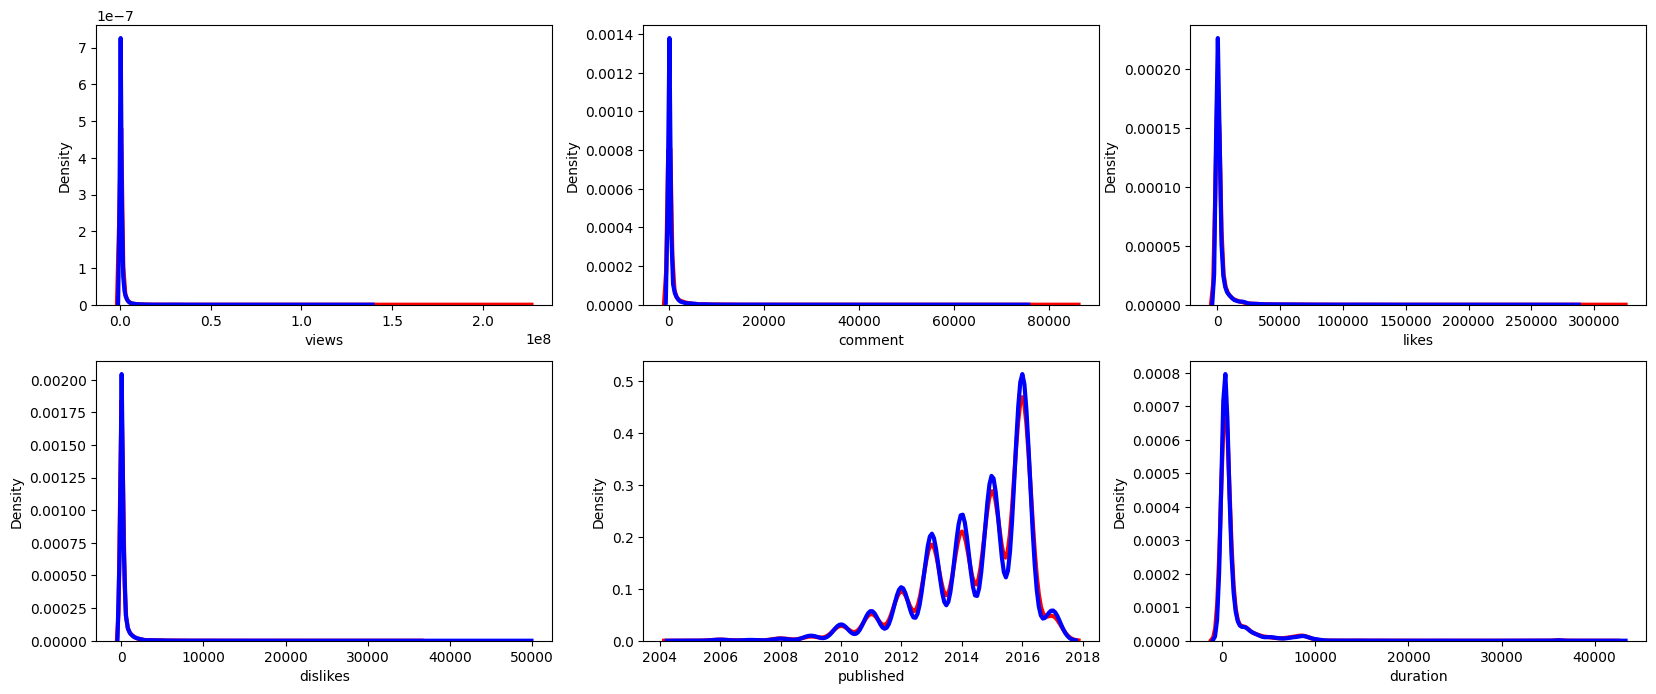

In [16]:
plt.figure(figsize=(20,8))
continuous_features=['views','comment','likes','dislikes','published','duration']
pos = 1
for i , feature in enumerate(continuous_features):
    plt.subplot(2 , 3 , pos)
    sns.distplot(test_df[feature], hist = False, kde = True, kde_kws = {'linewidth': 3},color='r' )
    sns.distplot(train_df[feature], hist = False, kde = True, kde_kws = {'linewidth': 3} ,color='b')
    pos = pos + 1

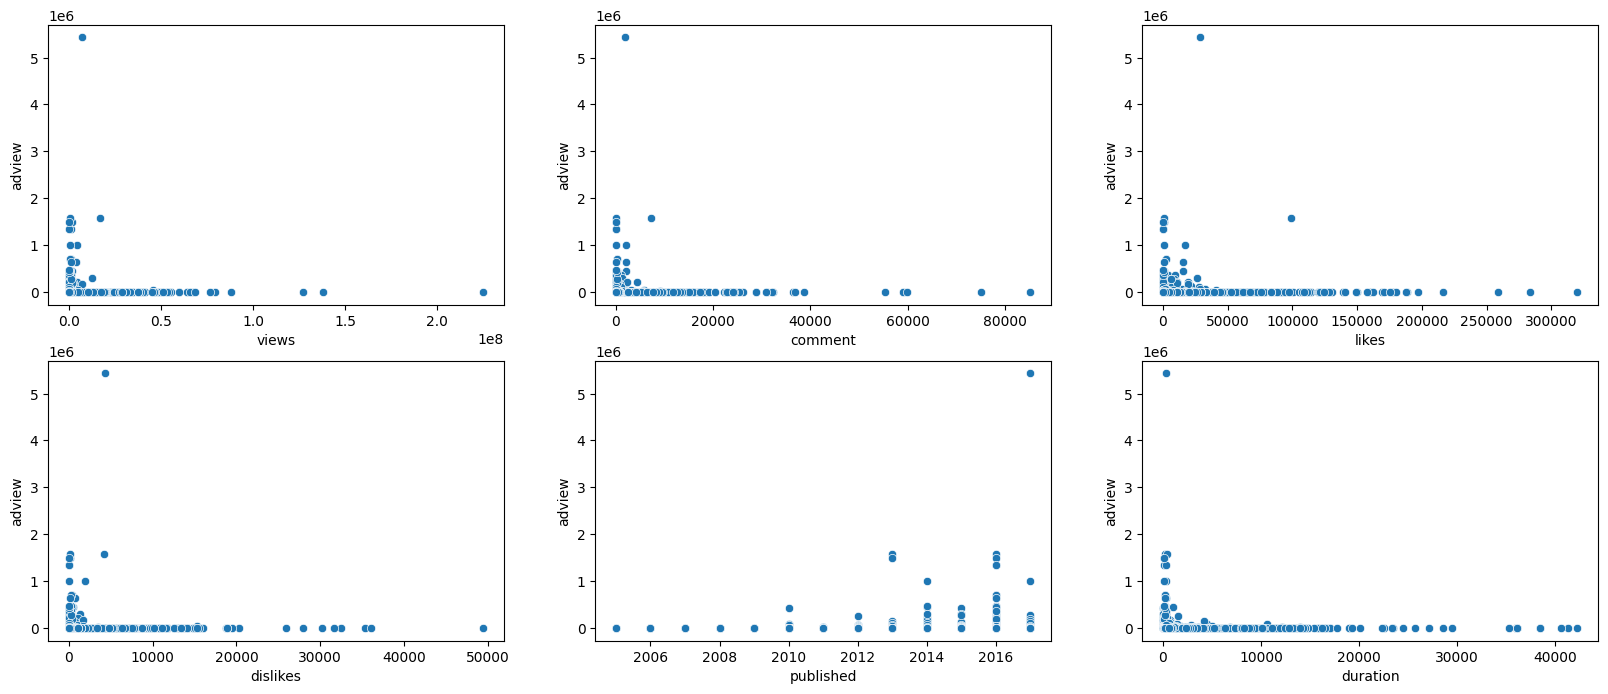

In [17]:
plt.figure(figsize=(20, 8))
pos = 1
for i, feature in enumerate(continuous_features):
  plt.subplot(2 , 3 , pos)
  sns.scatterplot(data=combined_df, x = feature, y= "adview")
  pos = pos + 1

<Axes: xlabel='category', ylabel='count'>

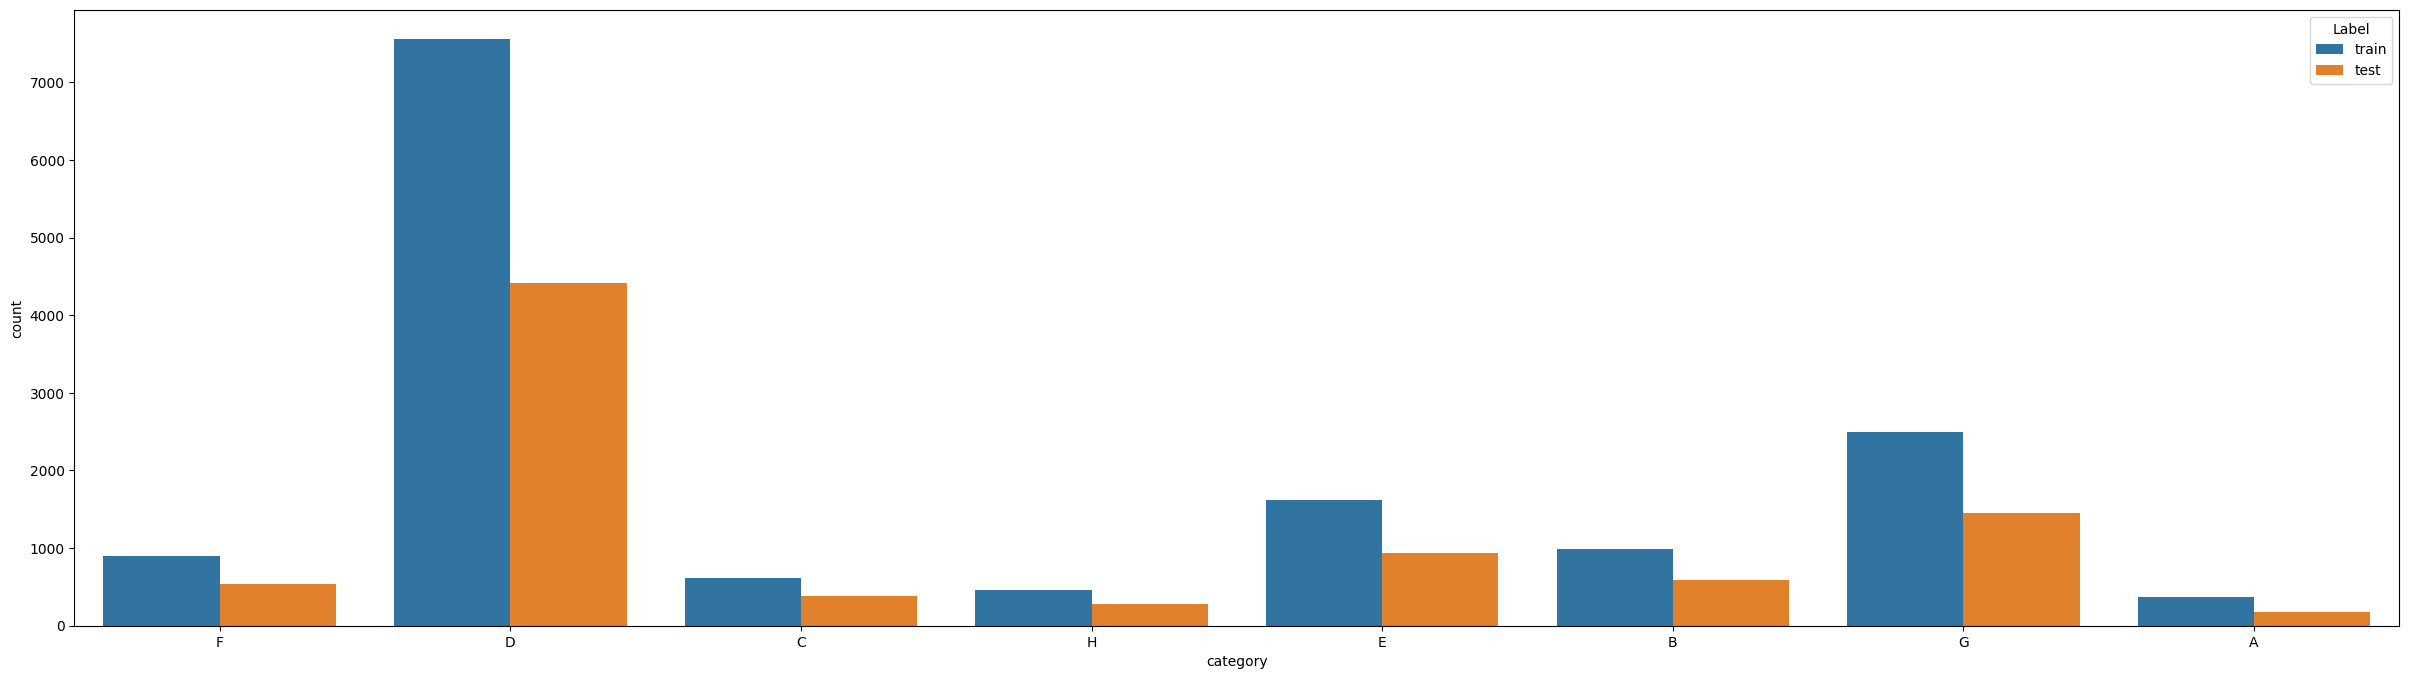

In [18]:
plt.figure(figsize=(30, 8))
sns.countplot(data = combined_df, x = 'category', hue="Label")

In [19]:
drop_columns = ["vidid",'Label','published','duration']

#  Drop columns
print("Number of columns before dropping : ",len(combined_df.columns))
print("Number of dropping columns : ",len(drop_columns))
combined_df.drop(columns=drop_columns, inplace=True, errors='ignore')
print("Number of columns after dropping : ",len(combined_df.columns))




Number of columns before dropping :  10
Number of dropping columns :  4
Number of columns after dropping :  6


In [20]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23763 entries, 0 to 8763
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   adview    14999 non-null  float64
 1   views     23763 non-null  int32  
 2   likes     23763 non-null  int32  
 3   dislikes  23763 non-null  int32  
 4   comment   23763 non-null  int32  
 5   category  23763 non-null  object 
dtypes: float64(1), int32(4), object(1)
memory usage: 928.2+ KB


In [21]:
from scipy.stats import skew
skew_check_col = [ 'views','likes','dislikes','comment']
skewed_feats = combined_df[skew_check_col].apply(lambda x : skew(x.dropna())).sort_values(ascending=False)
print('\nSkew in numerical features:\n')
skewness_df = pd.DataFrame({'Skew': skewed_feats})
print(skewness_df.head(7))


Skew in numerical features:

               Skew
views     29.926939
comment   18.761969
dislikes  18.269315
likes     11.914098


In [22]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

In [23]:
for col in skew_check_col:
  power = PowerTransformer(method='yeo-johnson', standardize=True)
  combined_df[[col]] = power.fit_transform(combined_df[[col]]) # fit with combined_data to avoid overfitting with training data

print('Number ofskewed numerical features got transform : ', len(skew_check_col))
     


Number ofskewed numerical features got transform :  4


In [24]:
combined_df = pd.get_dummies(combined_df).reset_index(drop=True)
   

combined_df.head()

new_train_data = combined_df.iloc[:len(train_df), :]
new_test_data = combined_df.iloc[len(train_df):, :]
X_train = new_train_data.drop('adview', axis=1)
y_train = np.log1p(new_train_data['adview'].values.ravel())
X_test = new_test_data.drop('adview', axis=1)


In [25]:
combined_df.head()

def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score} \nOptimized parameters: {params}")
    return params

In [26]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
import joblib
import optuna

c:\Users\2k22c\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
RANDOM_SEED = 23

# 10-fold CV
kfolds = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)
def tune(objective):
    study = optuna.create_study(direction= "maximize")
    study.optimize(objective,n_trials==100)
    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score} \nOptimized parameters: {params}")
    return params


In [28]:
def ridge_objective(trial):
    _alpha = trial.suggest_float("alpha",0.1,20)
    ridge = Ridge(alpha=_alpha,random_state= RANDOM_SEED)
    score = cross_val_score(
    ridge,X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score
ridge_params = {'alpha': 19.99855836300504}



In [29]:
ridge = Ridge(**ridge_params, random_state=RANDOM_SEED)
ridge.fit(X_train,y_train)

Ridge(alpha=19.99855836300504, random_state=23)

In [30]:
def lasso_objective(trial):

    _alpha = trial.suggest_float("alpha", 0.0001, 1)

    lasso = Lasso(alpha=_alpha, random_state=RANDOM_SEED)

    score = cross_val_score(
        lasso,X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score


# lasso_params = tune(lasso_objective)

# Best score: -1.8987548559962844 
lasso_params =  {'alpha': 0.0009661425571276957}
lasso = Lasso(**lasso_params, random_state=RANDOM_SEED)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0009661425571276957, random_state=23)

In [31]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor as gbr


In [32]:
def gbr_objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 50, 2000)
    _learning_rate = trial.suggest_float("learning_rate", 0.01, 1)
    _max_depth = trial.suggest_int("max_depth", 1, 20)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 20)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 20)
    _max_features = trial.suggest_int("max_features", 10, 50)

    gbr = GradientBoostingRegressor(
        n_estimators=_n_estimators,
        learning_rate=_learning_rate,
        max_depth=_max_depth, 
        max_features=_max_features,
        min_samples_leaf=_min_samples_leaf,
        min_samples_split=_min_samp_split,
        
        random_state=RANDOM_SEED,
    )
    score = cross_val_score(
        gbr, X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score

# gbr_params = tune(gbr_objective)

# Best score: -1.8222372332051289 
gbr_params = {'n_estimators': 1396, 'learning_rate': 0.014373145732630006,'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 10}
gbr = GradientBoostingRegressor(random_state=RANDOM_SEED, **gbr_params)
gbr.fit(X_train,y_train) 



GradientBoostingRegressor(learning_rate=0.014373145732630006, max_depth=6,
                          max_features=10, min_samples_leaf=7,
                          min_samples_split=6, n_estimators=1396,
                          random_state=23)

In [33]:
stack = StackingRegressor(
    estimators=[
        ('ridge', ridge),
        ('lasso', lasso),
        ('gradientboostingregressor', gbr)
    ],
    cv=kfolds)
stack.fit(X_train,y_train)

StackingRegressor(cv=KFold(n_splits=10, random_state=23, shuffle=True),
                  estimators=[('ridge',
                               Ridge(alpha=19.99855836300504, random_state=23)),
                              ('lasso',
                               Lasso(alpha=0.0009661425571276957,
                                     random_state=23)),
                              ('gradientboostingregressor',
                               GradientBoostingRegressor(learning_rate=0.014373145732630006,
                                                         max_depth=6,
                                                         max_features=10,
                                                         min_samples_leaf=7,
                                                         min_samples_split=6,
                                                         n_estimators=1396,
                                                         random_state=23))])

In [34]:
joblib.dump(stack, "prediction_model.pkl")
model=joblib.load("prediction_model.pkl")
model

StackingRegressor(cv=KFold(n_splits=10, random_state=23, shuffle=True),
                  estimators=[('ridge',
                               Ridge(alpha=19.99855836300504, random_state=23)),
                              ('lasso',
                               Lasso(alpha=0.0009661425571276957,
                                     random_state=23)),
                              ('gradientboostingregressor',
                               GradientBoostingRegressor(learning_rate=0.014373145732630006,
                                                         max_depth=6,
                                                         max_features=10,
                                                         min_samples_leaf=7,
                                                         min_samples_split=6,
                                                         n_estimators=1396,
                                                         random_state=23))])

In [35]:

print('Predict submission')
final_test_df = pd.read_csv("test.csv")

final_test_df['AdView'] = np.round(np.expm1(model.predict(X_test))).astype(int)

final_test_df.to_csv('submission_test.csv', index=False)

Predict submission


In [36]:
final_test_df.head()

,vidid,views,likes,dislikes,comment,published,duration,category,AdView
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B,6
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F,4
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D,3
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G,6
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B,7
